In [ ]:
# Descarregar dataset

!mkdir dataset
!wget -O dataset/train2014.zip http://images.cocodataset.org/zips/train2014.zip
!unzip dataset/train2014.zip -d dataset/

Streaming output truncated to the last 5000 lines.
 extracting: dataset/train2014/COCO_train2014_000000408557.jpg  
 extracting: dataset/train2014/COCO_train2014_000000013714.jpg  
 extracting: dataset/train2014/COCO_train2014_000000194043.jpg  
 extracting: dataset/train2014/COCO_train2014_000000219859.jpg  
 extracting: dataset/train2014/COCO_train2014_000000278135.jpg  
 extracting: dataset/train2014/COCO_train2014_000000141015.jpg  
 extracting: dataset/train2014/COCO_train2014_000000280923.jpg  
 extracting: dataset/train2014/COCO_train2014_000000200024.jpg  
 extracting: dataset/train2014/COCO_train2014_000000435713.jpg  
 extracting: dataset/train2014/COCO_train2014_000000249993.jpg  
 extracting: dataset/train2014/COCO_train2014_000000424160.jpg  
 extracting: dataset/train2014/COCO_train2014_000000142761.jpg  
 extracting: dataset/train2014/COCO_train2014_000000532668.jpg  
 extracting: dataset/train2014/COCO_train2014_000000564904.jpg  
 extracting: dataset/train2014/COCO_tra

In [ ]:
# Descarregar model VGG16 pre-entrenat

!mkdir models
!wget -O models/vgg16-00b39a1b.pth https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
# !wget -O models/vgg19-d01eb7cb.pth https://web.eecs.umich.edu/~justincj/models/vgg19-d01eb7cb.pth

--2020-12-20 15:05:06--  https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553451520 (528M) [application/x-tar]
Saving to: ‘models/vgg16-00b39a1b.pth’

models/vgg16-00b39a 100%[===================>] 527.81M  17.3MB/s    in 32s     

2020-12-20 15:05:39 (16.6 MB/s) - ‘models/vgg16-00b39a1b.pth’ saved [553451520/553451520]



In [ ]:
# Descarreguem imatges (si estan internet)
# Sino, s'ha de fer upload manual

!mkdir images/
!mkdir images/out

!wget -O images/punty.jpg https://upload.wikimedia.org/wikipedia/commons/5/5d/Seurat-La_Parade_detail.jpg
!wget -O images/starry.jpg https://media.overstockart.com/optimized/cache/data/product_images/VG485-1000x1000.jpg
!wget -O images/blue.jpg https://upload.wikimedia.org/wikipedia/commons/0/0a/Blue_sky_south_of_France.jpg

--2020-12-20 15:05:40--  https://upload.wikimedia.org/wikipedia/commons/5/5d/Seurat-La_Parade_detail.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357162 (349K) [image/jpeg]
Saving to: ‘images/punty.jpg’

images/punty.jpg    100%[===================>] 348.79K  1.56MB/s    in 0.2s    

2020-12-20 15:05:40 (1.56 MB/s) - ‘images/punty.jpg’ saved [357162/357162]

--2020-12-20 15:05:40--  https://media.overstockart.com/optimized/cache/data/product_images/VG485-1000x1000.jpg
Resolving media.overstockart.com (media.overstockart.com)... 23.12.207.94
Connecting to media.overstockart.com (media.overstockart.com)|23.12.207.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235722 (230K) [image/jpeg]
Saving to: ‘images/starry.jpg’

images/starry.jpg   100%[===============

In [ ]:
# Fitxer de Utils

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets

# Gram Matrix
def gram(tensor):
    B, C, H, W = tensor.shape
    x = tensor.view(B, C, H*W)
    x_t = x.transpose(1, 2)
    return  torch.bmm(x, x_t) / (C*H*W)

# Load image file
def load_image(path):
    # Images loaded as BGR
    img = cv2.imread(path)
    return img

# Show image
def show(img):
    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # imshow() only accepts float [0,1] or int [0,255]
    img = np.array(img/255).clip(0,1)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.show()

def saveimg(img, image_path):
    img = img.clip(0, 255)
    cv2.imwrite(image_path, img)

# Preprocessing ~ Image to Tensor
def itot(img, max_size=None):
    # Rescale the image
    if (max_size==None):
        itot_t = transforms.Compose([
            #transforms.ToPILImage(),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.mul(255))
        ])    
    else:
        H, W, C = img.shape
        image_size = tuple([int((float(max_size) / max([H,W]))*x) for x in [H, W]])
        itot_t = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.mul(255))
        ])

    # Convert image to tensor
    tensor = itot_t(img)

    # Add the batch_size dimension
    tensor = tensor.unsqueeze(dim=0)
    return tensor

# Preprocessing ~ Tensor to Image
def ttoi(tensor):
    # Add the means
    #ttoi_t = transforms.Compose([
    #    transforms.Normalize([-103.939, -116.779, -123.68],[1,1,1])])

    # Remove the batch_size dimension
    tensor = tensor.squeeze()
    #img = ttoi_t(tensor)
    img = tensor.cpu().numpy()
    
    # Transpose from [C, H, W] -> [H, W, C]
    img = img.transpose(1, 2, 0)
    return img

def transfer_color(src, dest):
    """
    Transfer Color using YIQ colorspace. Useful in preserving colors in style transfer.
    This method assumes inputs of shape [Height, Width, Channel] in BGR Color Space
    """
    src, dest = src.clip(0,255), dest.clip(0,255)
        
    # Resize src to dest's size
    H,W,_ = src.shape 
    dest = cv2.resize(dest, dsize=(W, H), interpolation=cv2.INTER_CUBIC)
    
    dest_gray = cv2.cvtColor(dest, cv2.COLOR_BGR2GRAY) #1 Extract the Destination's luminance
    src_yiq = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)   #2 Convert the Source from BGR to YIQ/YCbCr
    src_yiq[...,0] = dest_gray                         #3 Combine Destination's luminance and Source's IQ/CbCr
    
    return cv2.cvtColor(src_yiq, cv2.COLOR_YCrCb2BGR).clip(0,255)  #4 Convert new image from YIQ back to BGR

def plot_loss_hist(c_loss, s_loss, total_loss, title="Loss History"):
    x = [i for i in range(len(total_loss))]
    plt.figure(figsize=[10, 6])
    plt.plot(x, c_loss, label="Content Loss")
    plt.plot(x, s_loss, label="Style Loss")
    plt.plot(x, total_loss, label="Total Loss")
    
    plt.legend()
    plt.xlabel('Every 500 iterations')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show()

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. 
    Extends torchvision.datasets.ImageFolder()
    Reference: https://discuss.pytorch.org/t/dataloader-filenames-in-each-batch/4212/2
    """
    # override the __getitem__ method. this is the method dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)

        # the image file path
        path = self.imgs[index][0]

        # make a new tuple that includes original and the path
        tuple_with_path = (*original_tuple, path)
        return tuple_with_path

In [ ]:
# Estructura dels models

import torch
import torch.nn as nn
from torchvision import models, transforms

class VGG19(nn.Module):
    def __init__(self, vgg_path="models/vgg19-d01eb7cb.pth"):
        super(VGG19, self).__init__()
        # Load VGG Skeleton, Pretrained Weights
        vgg19_features = models.vgg19(pretrained=False)
        vgg19_features.load_state_dict(torch.load(vgg_path), strict=False)
        self.features = vgg19_features.features

        # Turn-off Gradient History
        for param in self.features.parameters():
            param.requires_grad = False

    def forward(self, x):
        layers = {'3': 'relu1_2', '8': 'relu2_2', '17': 'relu3_4', '22': 'relu4_2', '26': 'relu4_4', '35': 'relu5_4'}
        features = {}
        for name, layer in self.features._modules.items():
            x = layer(x)
            if name in layers:
                features[layers[name]] = x

        return features

class VGG16(nn.Module):
    def __init__(self, vgg_path="models/vgg16-00b39a1b.pth"):
        super(VGG16, self).__init__()
        # Load VGG Skeleton, Pretrained Weights
        vgg16_features = models.vgg16(pretrained=False)
        vgg16_features.load_state_dict(torch.load(vgg_path), strict=False)
        self.features = vgg16_features.features

        # Turn-off Gradient History
        for param in self.features.parameters():
            param.requires_grad = False

    def forward(self, x):
        layers = {'3': 'relu1_2', '8': 'relu2_2', '15': 'relu3_3', '22': 'relu4_3'}
        features = {}
        for name, layer in self.features._modules.items():
            x = layer(x)
            if name in layers:
                features[layers[name]] = x
                if (name=='22'):
                    break

        return features

class TransformerNetwork(nn.Module):
    """Feedforward Transformation Network without Tanh
    reference: https://arxiv.org/abs/1603.08155 
    exact architecture: https://cs.stanford.edu/people/jcjohns/papers/fast-style/fast-style-supp.pdf
    """
    def __init__(self):
        super(TransformerNetwork, self).__init__()
        self.ConvBlock = nn.Sequential(
            ConvLayer(3, 32, 9, 1),
            nn.ReLU(),
            ConvLayer(32, 64, 3, 2),
            nn.ReLU(),
            ConvLayer(64, 128, 3, 2),
            nn.ReLU()
        )
        self.ResidualBlock = nn.Sequential(
            ResidualLayer(128, 3), 
            ResidualLayer(128, 3), 
            ResidualLayer(128, 3), 
            ResidualLayer(128, 3), 
            ResidualLayer(128, 3)
        )
        self.DeconvBlock = nn.Sequential(
            DeconvLayer(128, 64, 3, 2, 1),
            nn.ReLU(),
            DeconvLayer(64, 32, 3, 2, 1),
            nn.ReLU(),
            ConvLayer(32, 3, 9, 1, norm="None")
        )

    def forward(self, x):
        x = self.ConvBlock(x)
        x = self.ResidualBlock(x)
        out = self.DeconvBlock(x)
        return out

class TransformerNetworkTanh(TransformerNetwork):
    """A modification of the transformation network that uses Tanh function as output 
    This follows more closely the architecture outlined in the original paper's supplementary material
    his model produces darker images and provides retro styling effect
    Reference: https://cs.stanford.edu/people/jcjohns/papers/fast-style/fast-style-supp.pdf
    """
    # override __init__ method
    def __init__(self, tanh_multiplier=150):
        super(TransformerNetworkTanh, self).__init__()
        # Add a Tanh layer before output
        self.DeconvBlock = nn.Sequential(
            DeconvLayer(128, 64, 3, 2, 1),
            nn.ReLU(),
            DeconvLayer(64, 32, 3, 2, 1),
            nn.ReLU(),
            ConvLayer(32, 3, 9, 1, norm="None"),
            nn.Tanh()
        )
        self.tanh_multiplier = tanh_multiplier

    # Override forward method
    def forward(self, x):
        return super(TransformerNetworkTanh, self).forward(x) * self.tanh_multiplier

class ConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, norm="instance"):
        super(ConvLayer, self).__init__()
        # Padding Layers
        padding_size = kernel_size // 2
        self.reflection_pad = nn.ReflectionPad2d(padding_size)

        # Convolution Layer
        self.conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride)

        # Normalization Layers
        self.norm_type = norm
        if (norm=="instance"):
            self.norm_layer = nn.InstanceNorm2d(out_channels, affine=True)
        elif (norm=="batch"):
            self.norm_layer = nn.BatchNorm2d(out_channels, affine=True)

    def forward(self, x):
        x = self.reflection_pad(x)
        x = self.conv_layer(x)
        if (self.norm_type=="None"):
            out = x
        else:
            out = self.norm_layer(x)
        return out

class ResidualLayer(nn.Module):
    """
    Deep Residual Learning for Image Recognition

    https://arxiv.org/abs/1512.03385
    """
    def __init__(self, channels=128, kernel_size=3):
        super(ResidualLayer, self).__init__()
        self.conv1 = ConvLayer(channels, channels, kernel_size, stride=1)
        self.relu = nn.ReLU()
        self.conv2 = ConvLayer(channels, channels, kernel_size, stride=1)

    def forward(self, x):
        identity = x                     # preserve residual
        out = self.relu(self.conv1(x))   # 1st conv layer + activation
        out = self.conv2(out)            # 2nd conv layer
        out = out + identity             # add residual
        return out

class DeconvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, output_padding, norm="instance"):
        super(DeconvLayer, self).__init__()

        # Transposed Convolution 
        padding_size = kernel_size // 2
        self.conv_transpose = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding_size, output_padding)

        # Normalization Layers
        self.norm_type = norm
        if (norm=="instance"):''
            self.norm_layer = nn.InstanceNorm2d(out_channels, affine=True)
        elif (norm=="batch"):
            self.norm_layer = nn.BatchNorm2d(out_channels, affine=True)

    def forward(self, x):
        x = self.conv_transpose(x)
        if (self.norm_type=="None"):
            out = x
        else:
            out = self.norm_layer(x)
        return out

========Epoch 1/1========
========Iteration 1/10348========
	Content Loss:	2854898.75
	Style Loss:	27730338.00
	Total Loss:	30585236.00
Time elapsed:	0.4996767044067383 seconds
Saved TransformerNetwork checkpoint file at models/checkpoint_0.pth
Saved sample tranformed image at images/out/sample0_0.png
========Iteration 501/10348========
	Content Loss:	2364927.50
	Style Loss:	2597722.70
	Total Loss:	4962650.70
Time elapsed:	179.87631154060364 seconds
Saved TransformerNetwork checkpoint file at models/checkpoint_500.pth
Saved sample tranformed image at images/out/sample0_500.png
========Iteration 1001/10348========
	Content Loss:	1947565.00
	Style Loss:	1500519.92
	Total Loss:	3448086.37
Time elapsed:	358.1939127445221 seconds
Saved TransformerNetwork checkpoint file at models/checkpoint_1000.pth
Saved sample tranformed image at images/out/sample0_1000.png
========Iteration 1501/10348========
	Content Loss:	1731935.50
	Style Loss:	1121911.19
	Total Loss:	2853847.59
Time elapsed:	537.2995

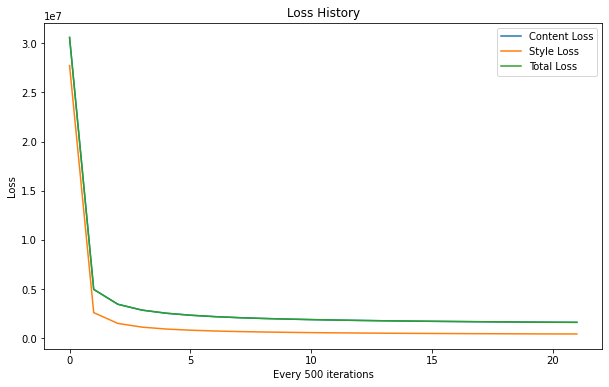

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import random
import numpy as np
import time


# GLOBAL SETTINGS
TRAIN_IMAGE_SIZE = 256
DATASET_PATH = "dataset"
NUM_EPOCHS = 1
BATCH_SIZE = 32

STYLE_IMAGE_PATH = "images/punty.jpg"
CONTENT_WEIGHT = 17 # 17
STYLE_WEIGHT = 50 # 25
ADAM_LR = 0.001

SAVE_MODEL_PATH = "models/"
SAVE_IMAGE_PATH = "images/out/"
SAVE_MODEL_EVERY = 500 # 2,000 Images with batch size 4
SEED = 1337
PLOT_LOSS = 1

def train():
    # Seeds
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    # Device
    device = ("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and Dataloader
    transform = transforms.Compose([
        transforms.Resize(TRAIN_IMAGE_SIZE),
        transforms.CenterCrop(TRAIN_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    train_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Load networks
    transformernetwork = TransformerNetwork().to(device)
    VGG = VGG16().to(device)

    # Get Style Features
    imagenet_neg_mean = torch.tensor([-103.939, -116.779, -123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    style_image = load_image(STYLE_IMAGE_PATH)
    style_tensor = itot(style_image).to(device)
    style_tensor = style_tensor.add(imagenet_neg_mean)
    B, C, H, W = style_tensor.shape
    style_features = VGG(style_tensor.expand([BATCH_SIZE, C, H, W]))
    style_gram = {}
    for key, value in style_features.items():
        style_gram[key] = gram(value)

    # Optimizer settings
    optimizer = optim.Adam(transformernetwork.parameters(), lr=ADAM_LR)

    # Loss trackers
    content_loss_history = []
    style_loss_history = []
    total_loss_history = []
    batch_content_loss_sum = 0
    batch_style_loss_sum = 0
    batch_total_loss_sum = 0

    # Optimization/Training Loop
    batch_count = 1
    start_time = time.time()
    for epoch in range(NUM_EPOCHS):
        print("========Epoch {}/{}========".format(epoch+1, NUM_EPOCHS))
        for content_batch, _ in train_loader:
            # Get current batch size in case of odd batch sizes
            curr_batch_size = content_batch.shape[0]

            # Free-up unneeded cuda memory
            torch.cuda.empty_cache()

            # Zero-out Gradients
            optimizer.zero_grad()

            # Generate images and get features
            content_batch = content_batch[:,[2,1,0]].to(device)
            generated_batch = transformernetwork(content_batch)
            content_features = VGG(content_batch.add(imagenet_neg_mean))
            generated_features = VGG(generated_batch.add(imagenet_neg_mean))

            # Content Loss
            MSELoss = nn.MSELoss().to(device)
            content_loss = CONTENT_WEIGHT * MSELoss(generated_features['relu2_2'], content_features['relu2_2'])            
            batch_content_loss_sum += content_loss

            # Style Loss
            style_loss = 0
            for key, value in generated_features.items():
                s_loss = MSELoss(gram(value), style_gram[key][:curr_batch_size])
                style_loss += s_loss
            style_loss *= STYLE_WEIGHT
            batch_style_loss_sum += style_loss.item()

            # Total Loss
            total_loss = content_loss + style_loss
            batch_total_loss_sum += total_loss.item()

            # Backprop and Weight Update
            total_loss.backward()
            optimizer.step()

            # Save Model and Print Losses
            if (((batch_count-1)%SAVE_MODEL_EVERY == 0) or (batch_count==NUM_EPOCHS*len(train_loader))):
                # Print Losses
                print("========Iteration {}/{}========".format(batch_count, NUM_EPOCHS*len(train_loader)))
                print("\tContent Loss:\t{:.2f}".format(batch_content_loss_sum/batch_count))
                print("\tStyle Loss:\t{:.2f}".format(batch_style_loss_sum/batch_count))
                print("\tTotal Loss:\t{:.2f}".format(batch_total_loss_sum/batch_count))
                print("Time elapsed:\t{} seconds".format(time.time()-start_time))

                # Save Model
                checkpoint_path = SAVE_MODEL_PATH + "checkpoint_" + str(batch_count-1) + ".pth"
                torch.save(transformernetwork.state_dict(), checkpoint_path)
                print("Saved TransformerNetwork checkpoint file at {}".format(checkpoint_path))

                # Save sample generated image
                sample_tensor = generated_batch[0].clone().detach().unsqueeze(dim=0)
                sample_image = ttoi(sample_tensor.clone().detach())
                sample_image_path = SAVE_IMAGE_PATH + "sample0_" + str(batch_count-1) + ".png"
                saveimg(sample_image, sample_image_path)
                print("Saved sample tranformed image at {}".format(sample_image_path))

                # Save loss histories
                content_loss_history.append(batch_total_loss_sum/batch_count)
                style_loss_history.append(batch_style_loss_sum/batch_count)
                total_loss_history.append(batch_total_loss_sum/batch_count)

            # Iterate Batch Counter
            batch_count+=1

    stop_time = time.time()
    # Print loss histories
    print("Done Training the Transformer Network!")
    print("Training Time: {} seconds".format(stop_time-start_time))
    print("========Content Loss========")
    print(content_loss_history) 
    print("========Style Loss========")
    print(style_loss_history) 
    print("========Total Loss========")
    print(total_loss_history) 

    # Save TransformerNetwork weights
    transformernetwork.eval()
    transformernetwork.cpu()
    final_path = SAVE_MODEL_PATH + "transformer_weight.pth"
    print("Saving TransformerNetwork weights at {}".format(final_path))
    torch.save(transformernetwork.state_dict(), final_path)
    print("Done saving final model")

    # Plot Loss Histories
    if (PLOT_LOSS):
        plot_loss_hist(content_loss_history, style_loss_history, total_loss_history)

train()
